# 1. Load and Inspect the Stock Price Dataset

<div data-purpose="safely-set-inner-html:rich-text-viewer:html" class="lab-rich-text-viewer--lab-html-content---C2Yj  rt-scaffolding"><p>In this task, you will import the required <strong>Python libraries</strong> and the <strong>stock price dataset</strong> (stock_prices.csv) and perform a first data inspection. The DataFrame shall have a DatetimeIndex. Confirm that there are <strong>no missing values (NaN)</strong> in the dataset. </p><p><br></p><p>Note that the following imports are required:</p><ul><li><p>pandas</p></li><li><p>numpy</p></li><li><p>matplotlib.pyplot</p></li><li><p>seaborn</p></li><li><p>statsmodels.formula.api</p></li></ul></div>

In [1]:
"""
1. Import the Python Libraries pandas (pd), numpy (np), matplotlib.pyplot (plt), seaborn (sns) 
and statsmodels.formula.api (smf). Limit the number of displayed 
decimals in floats to 2 (float_format = {:, .2f}).
"""
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
pd.options.display.float_format = "{:,.2f}".format


In [2]:
"""
Read the stock price dataset from the CSV-file stock_prices.csv into a Pandas DataFrame (variable name: prices). 
Create a DatetimeIndex by passing the "Date" column to the parameters index_col and parse_dates and inspect.
"""

prices = pd.read_csv("stock_prices.csv", index_col = "Date", parse_dates = ["Date"])
prices

,AAPL,AJG,AVB,DLR,ICE,INCY,KHC,LLY,MCHP,MDT,MOH,NDAQ,PRU,STLD,TER
Date,,,,,,,,,,,,,,,
2019-12-31,73.41,95.23,209.70,119.74,92.55,87.32,32.13,131.43,52.36,113.45,135.69,35.70,93.74,34.04,68.19
2020-01-02,75.09,95.51,207.24,118.00,92.67,85.97,31.61,132.21,53.80,114.56,133.37,35.94,94.84,33.80,69.68
2020-01-03,74.36,95.31,209.23,119.94,94.67,77.90,31.24,131.77,52.62,113.88,132.54,36.09,93.26,33.20,68.23
2020-01-06,74.95,95.75,209.58,118.86,94.70,77.34,31.31,132.26,51.87,114.89,137.35,36.07,93.49,33.10,66.75
2020-01-07,74.60,94.72,205.02,117.69,94.43,77.14,30.76,132.51,55.35,114.49,139.26,35.47,93.39,33.83,68.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,131.86,188.41,163.03,100.87,102.81,81.36,40.52,367.90,69.93,77.50,335.08,61.28,99.56,102.59,86.56
2022-12-27,130.03,189.28,162.80,100.35,102.11,79.59,40.96,364.88,69.03,77.64,334.37,60.98,99.35,102.90,84.76
2022-12-28,126.04,187.95,161.08,99.40,102.27,79.44,40.44,365.22,67.87,76.30,332.42,60.70,98.37,99.89,84.24


In [3]:
"""
Inspect the DataFrame with the info() method and confirm there are no missing values (NaN) in the dataset.
"""

prices.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 757 entries, 2019-12-31 to 2022-12-30
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    757 non-null    float64
 1   AJG     757 non-null    float64
 2   AVB     757 non-null    float64
 3   DLR     757 non-null    float64
 4   ICE     757 non-null    float64
 5   INCY    757 non-null    float64
 6   KHC     757 non-null    float64
 7   LLY     757 non-null    float64
 8   MCHP    757 non-null    float64
 9   MDT     757 non-null    float64
 10  MOH     757 non-null    float64
 11  NDAQ    757 non-null    float64
 12  PRU     757 non-null    float64
 13  STLD    757 non-null    float64
 14  TER     757 non-null    float64
dtypes: float64(15)
memory usage: 94.6 KB


In [4]:
"""
Save all Stock Ticker Symbols in a Python list (variable name: symbols).
"""

symbols = prices.columns.to_list()

# 2. Visualize Prices and Calculate Daily Price Returns

<div data-purpose="safely-set-inner-html:rich-text-viewer:html" class="lab-rich-text-viewer--lab-html-content---C2Yj  rt-scaffolding"><p>In this task, you will create a simple<strong> price chart</strong> and convert daily stock prices (non-stationary time series) into daily <strong>stock price returns </strong>(covariance stationary time series). Make sure that daily stock returns are in % (for example: 0.5 for 0.5% and not 0.005). Check visually if stock returns are covariance stationary.</p><p>Note: For more information on covariance stationarity, please check the asset: covariance_stationarity.pdf. </p></div>

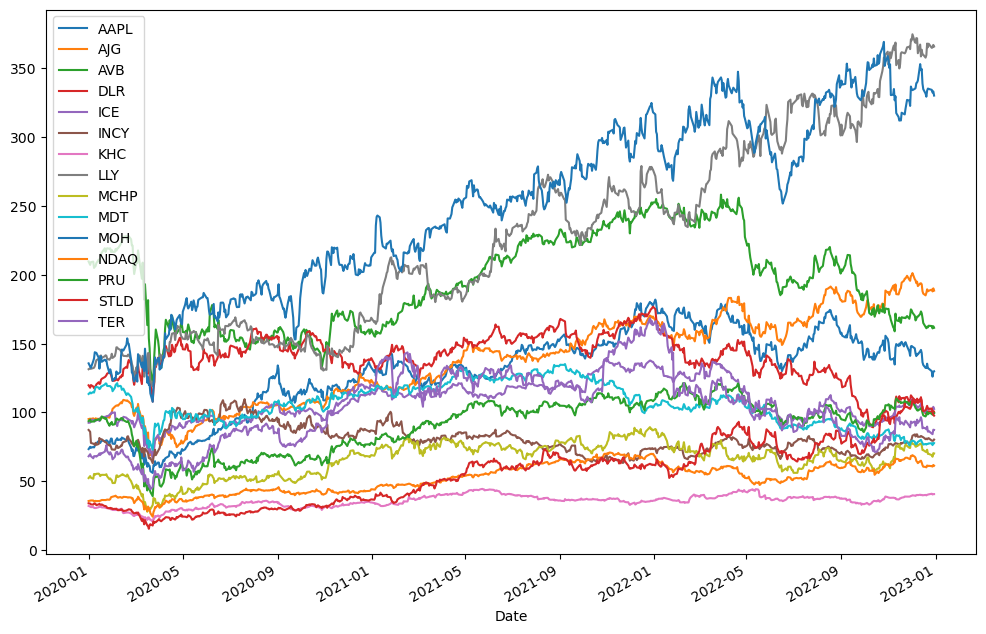

In [5]:
"""
Visualize daily stock prices over time with a simple price chart (figsize: (12, 8)) using Matplotlib.
"""

prices.plot(figsize = (12, 8))
plt.show()

In [6]:
"""
Calculate daily stock price returns (in %) with .pct_change() and .mul(100) and 
save the DataFrame in the variable returns. Remove rows with missing Values (NaN).
"""

returns = prices.pct_change().mul(100).dropna()


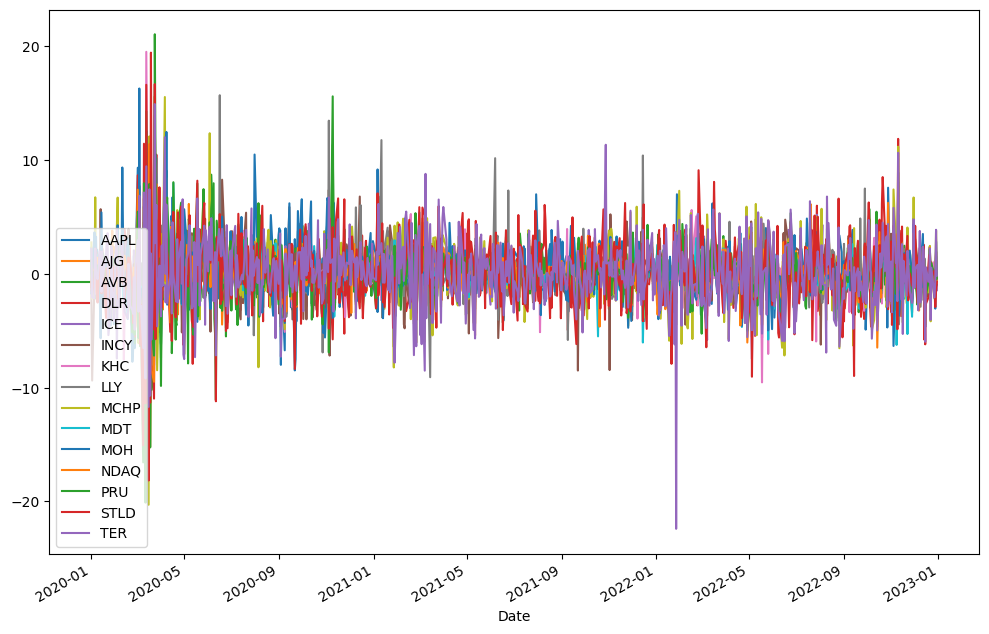

In [7]:
"""
Plot returns with a simple matplotlib line plot (figsize: (12, 8) and confirm visually that stock price returns 
are covariance stationary.
"""

returns.plot(figsize = (12,8))
plt.show()
                                                 
# (-> Unlike Prices, Financial Returns are covariance stationary.)

# 3. Load and Visualize the Fama/French 5 Factors Dataset

<div class="task-panel-v2--description--diib8"><div data-purpose="safely-set-inner-html:rich-text-viewer:html" class="lab-rich-text-viewer--lab-html-content---C2Yj  rt-scaffolding"><p>In this task, you will <strong>load</strong> the <strong>Fama/French 5 Factors dataset</strong> ("factors.csv") and perform a <strong>first data inspection and visualization</strong>.<strong> </strong>Confirm that there are <strong>no missing values </strong>(NaN) in the dataset and check visually if the factors are covariance stationary.</p><p>Note: For more information on the Fama/French Factors, please check the asset FamaFrench_factors.pdf.</p></div></div>

In [8]:
"""
Read the Fama/French 5 Factors dataset from the CSV-file factors.csv into a Pandas DataFrame 
(variable name: factors). Create a DatetimeIndex by passing the "Date" column to the parameters index_col 
and parse_dates and inspect.
"""

factors = pd.read_csv("factors.csv", index_col= "Date", parse_dates = ["Date"])
factors

,Mkt_Prem,SMB,HML,RMW,CMA,RF
Date,,,,,,
2020-01-02,0.86,-0.97,-0.34,0.24,-0.22,0.01
2020-01-03,-0.67,0.30,0.01,-0.14,-0.10,0.01
2020-01-06,0.36,-0.21,-0.55,-0.17,-0.26,0.01
2020-01-07,-0.19,-0.03,-0.25,-0.13,-0.25,0.01
2020-01-08,0.47,-0.17,-0.64,-0.20,-0.17,0.01
...,...,...,...,...,...,...
2022-12-23,0.51,-0.34,1.15,0.86,0.46,0.02
2022-12-27,-0.51,-0.42,1.43,1.13,1.19,0.02
2022-12-28,-1.23,-0.30,-0.29,-0.96,-0.03,0.02


In [9]:
"""
Inspect the DataFrame with the info() method and confirm there are no missing values (NaN) in the dataset.
"""

factors.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 756 entries, 2020-01-02 to 2022-12-30
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Mkt_Prem  756 non-null    float64
 1   SMB       756 non-null    float64
 2   HML       756 non-null    float64
 3   RMW       756 non-null    float64
 4   CMA       756 non-null    float64
 5   RF        756 non-null    float64
dtypes: float64(6)
memory usage: 41.3 KB


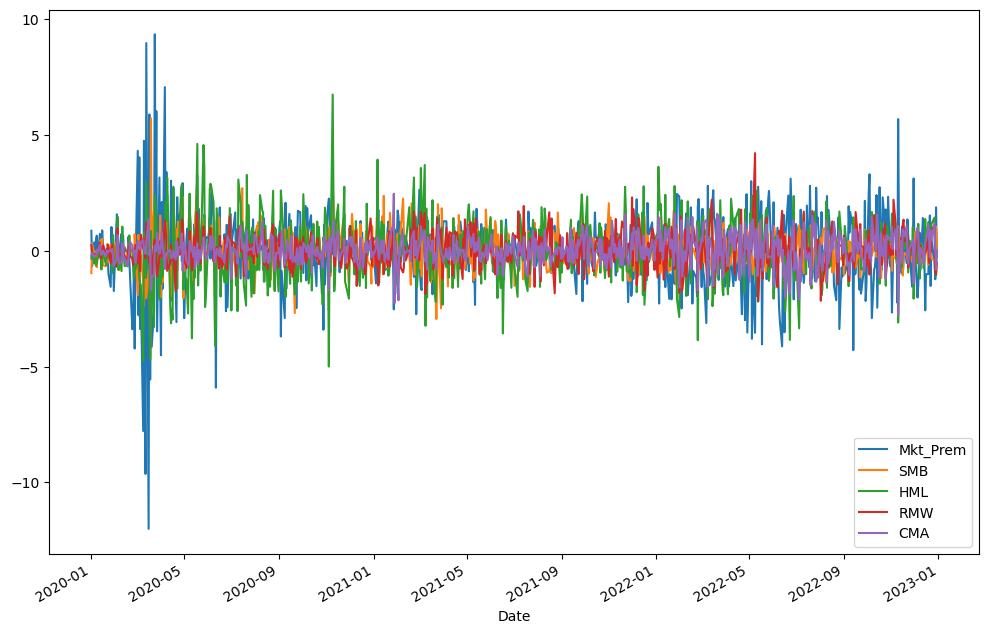

In [10]:
"""
Plot all five factors (excl. RF) with a simple matplotlib line plot (figsize: (12, 8)) and 
confirm visually that factors are covariance stationary.
"""
factors.drop(columns = ["RF"]).plot(figsize = (12,8))
plt.show()

# (-> Factors are covariance stationary.)

In [11]:
# Save all Factor Names in a Python list (variable name: fivefactors)

fivefactors = factors.columns[:5].to_list() 


# 4. Merge Datasets and Prepare the Dependent Variables

<div data-purpose="safely-set-inner-html:rich-text-viewer:html" class="lab-rich-text-viewer--lab-html-content---C2Yj  rt-scaffolding"><p>In this task, you will <strong>merge the two DataFrames</strong> with stock returns and factors. Then you will calculate and prepare the <strong>stock return premiums</strong> over the risk-free rate (the dependent variables in the regression). You can then drop the column RF. </p><p>Note: For more information on the Fama/French 5 Factor Regression Model, please check the asset FamaFrench_models. </p></div>

In [12]:
"""
Concatenate (pd.concat) the two dataframes: returns and factors with an outer join along the columns (1) axis. 
Save the merged DataFrame in the variable data.
"""

data = pd.concat([returns, factors], join = "outer", axis = 1)

In [13]:
# Prepare the dependent variables by calculating the stock return premiums over the Risk-Free rate (RF).

data[symbols] = data[symbols].sub(data["RF"], axis = 0)

In [14]:
# Drop the column RF "inplace" as it is no longer needed.

data.drop(columns = ["RF"], inplace = True)


# 5. Select the Apple Inc. Stock (Showcase)

<div data-purpose="safely-set-inner-html:rich-text-viewer:html" class="lab-rich-text-viewer--lab-html-content---C2Yj  rt-scaffolding"><p>In this task, you will <strong>prepare the dataset</strong> with the Apple Inc. stock only (showcase stock). The Apple Inc. dataset should be a subset of "data" and shall include daily stock return premiums for AAPL and all five factors. </p></div>

In [15]:
# Create and save a list (filter_list) with all five factor names and "AAPL".

filter_list = fivefactors + ["AAPL"]


In [16]:
# Filter data with filter_list and save the new DataFrame in the variable aapl. Inspect aapl.

aapl = data[filter_list]
aapl

,Mkt_Prem,SMB,HML,RMW,CMA,AAPL
Date,,,,,,
2020-01-02,0.86,-0.97,-0.34,0.24,-0.22,2.28
2020-01-03,-0.67,0.30,0.01,-0.14,-0.10,-0.98
2020-01-06,0.36,-0.21,-0.55,-0.17,-0.26,0.79
2020-01-07,-0.19,-0.03,-0.25,-0.13,-0.25,-0.48
2020-01-08,0.47,-0.17,-0.64,-0.20,-0.17,1.60
...,...,...,...,...,...,...
2022-12-23,0.51,-0.34,1.15,0.86,0.46,-0.30
2022-12-27,-0.51,-0.42,1.43,1.13,1.19,-1.40
2022-12-28,-1.23,-0.30,-0.29,-0.96,-0.03,-3.08


# 6. Perform an Explanatory Data Analysis (EDA) - Correlations

<div data-purpose="safely-set-inner-html:rich-text-viewer:html" class="lab-rich-text-viewer--lab-html-content---C2Yj  rt-scaffolding"><p>In this task, you will perform an <strong>Explanatory Data Analysis</strong> (EDA) and <strong>statistical data visualization </strong>for AAP. You will calculate and visualize <strong>pairwise correlations</strong> and identify the factor that shows the <strong>strongest correlation</strong> with the dependent variable.</p></div>

In [17]:
# Calculate the pairwise correlation matrix with corr().

corr_matrix = aapl.corr()

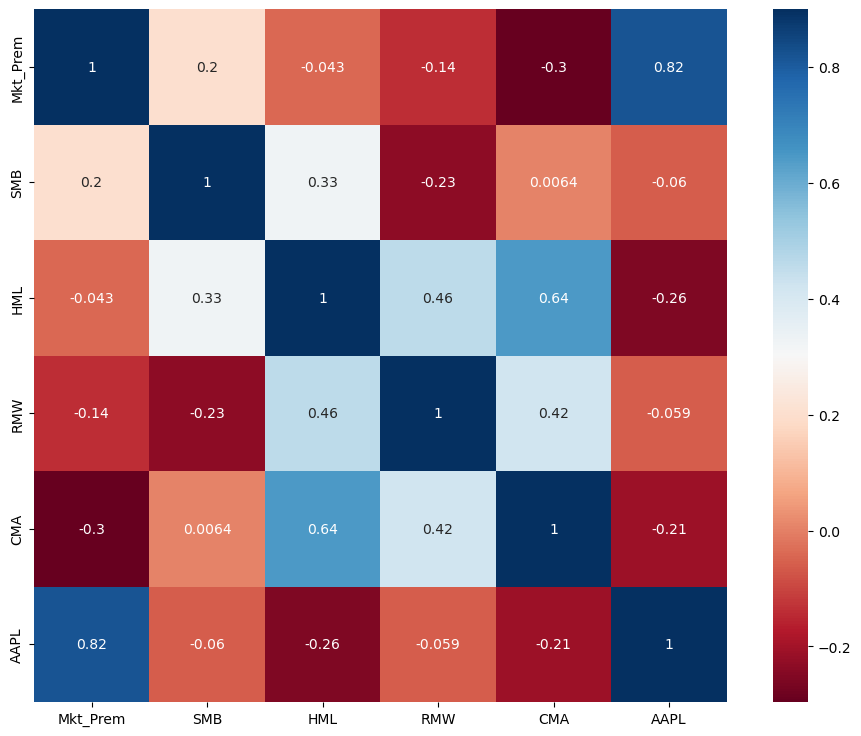

In [18]:
"""
Visualize the matrix with a seaborn heatmap (figsize (12, 8)) . Correlations shall be annotated (annot = True) 
to the figure and positive (negative) correlations shall be colored in blue (red) with cmap = "RdBu".
"""

plt.figure(figsize=(12,9))
sns.heatmap(corr_matrix, vmax=0.9, square=True, annot = True, cmap = "RdBu")
plt.show()


# (-> Market Factor (Mkt_Prem) has strongest correlation with Dependent Variable (AAPL).)

# 7. Perform an Explanatory Data Analysis (EDA) - Pair Plots and Regression Plots

<div data-purpose="safely-set-inner-html:rich-text-viewer:html" class="lab-rich-text-viewer--lab-html-content---C2Yj  rt-scaffolding"><p>In this task, you will continue the <strong>Explanatory Data Analysis</strong> (EDA) and <strong>statistical data visualization </strong>for AAPL.</p><p>You will <strong>analyze and visualize</strong> the <strong>statistical relationship</strong> between the dependent and the independent factors. Please <strong>confirm visually</strong> that the relationship between <em>AAPL</em> and the factor <em>Mkt_Prem</em> is strongly <strong>linear.</strong></p></div>

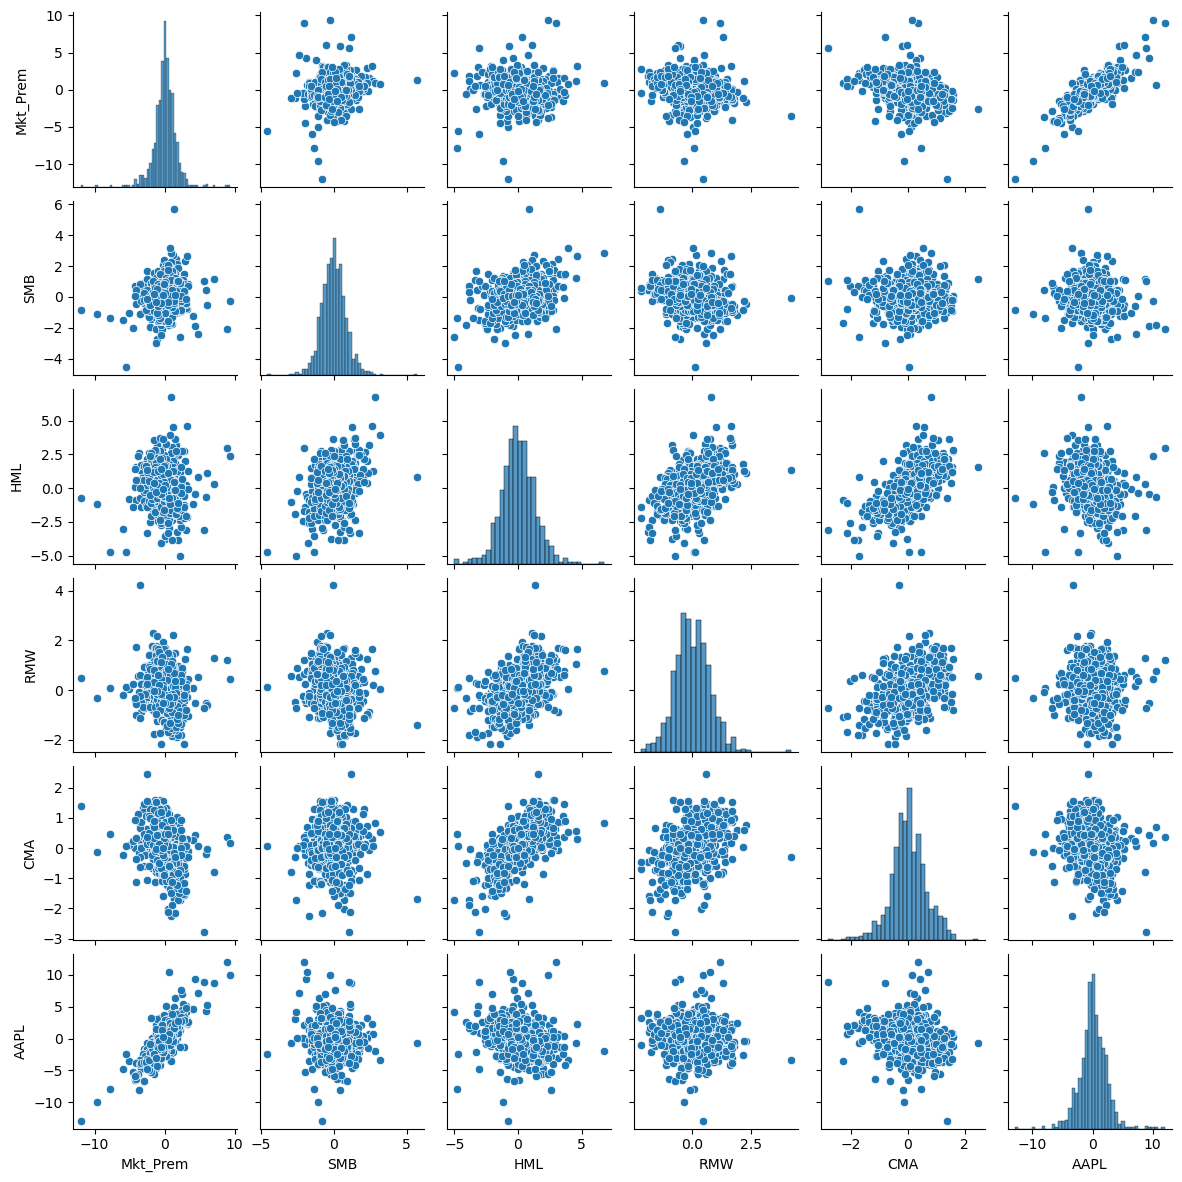

In [19]:
# Create pair-wise scatterplots with a seaborn pairplot (height = 2).

sns.pairplot(aapl, height = 2)
plt.show()

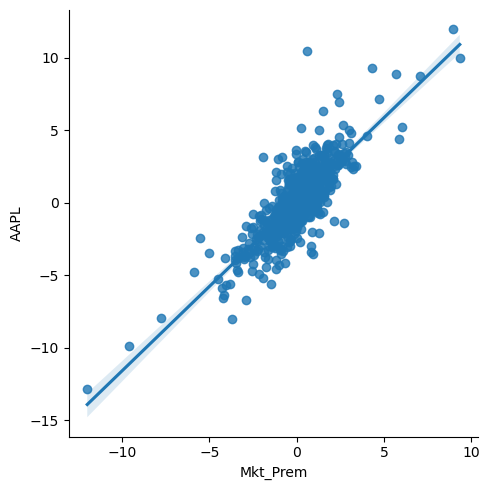

In [20]:
# Confirm with a seaborn lmplot that the relationship between AAPL (y-axis) and Mkt_Prem (x-axis) is strongly linear.

sns.lmplot(x = "Mkt_Prem", y = "AAPL", data = aapl)
plt.show()

# (-> Relationship between AAPL and Mkt_Prem is most likely strongly linear).

# 8. Define and Fit a Multiple Linear Regression Model

<div data-purpose="safely-set-inner-html:rich-text-viewer:html" class="lab-rich-text-viewer--lab-html-content---C2Yj  rt-scaffolding"><p>In this task, you will<strong> </strong>define and fit a <strong>multiple linear regression model</strong> for the <strong>dependent variable "AAPL"</strong>. Please include <strong>all five factors</strong> as independent variables.</p></div>

In [21]:
"""
Define a multiple linear regression model using smf.ols() and an appropriate string formula. 
Remember, "AAPL" is the dependent variable. All other factors are independent variables.
"""

model = smf.ols("AAPL ~ Mkt_Prem + SMB + HML + RMW + CMA", data = aapl)

In [22]:
# Fit the model and save the fitted model in the variable "results".

results = model.fit()

# 9. Analyze the Results of Regression and Hypothesis Testing

<div data-purpose="safely-set-inner-html:rich-text-viewer:html" class="lab-rich-text-viewer--lab-html-content---C2Yj  rt-scaffolding"><p>In this task, you will analyze and interpret the results of the <strong>OLS regression and hypothesis testing </strong>for AAPL. The first goal is to <strong>identify all significant independent variables</strong> at the <strong>5%</strong> Significance Level. Get and inspect the <strong>regression coefficients</strong> and the <strong>coefficient of determination </strong>(rsquared).</p><p>Note: For more information on OLS regression results, please check the asset regression_summary.png.</p></div>

In [23]:
# Print the results summary table and inspect it.

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   AAPL   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     615.7
Date:                Fri, 08 Mar 2024   Prob (F-statistic):          1.29e-262
Time:                        00:15:16   Log-Likelihood:                -1094.5
No. Observations:                 756   AIC:                             2201.
Df Residuals:                     750   BIC:                             2229.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0165      0.038      0.438      0.6

In [24]:
"""
To determine if an independent variable explains the dependent variable with statistical significance, 
check if the regression coefficient's p-value is less than the Significance Level (5%).
"""
significance_level = 0.05
results.pvalues < significance_level

Intercept    False
Mkt_Prem      True
SMB           True
HML           True
RMW           True
CMA           True
dtype: bool

In [25]:
#  Get the regression coefficients.

results.params

Intercept    0.02
Mkt_Prem     1.31
SMB         -0.19
HML         -0.77
RMW          0.42
CMA          1.10
dtype: float64

In [26]:
# Get the coefficient of determination (rsquared).

results.rsquared

0.8041010875160647

# 10. Test the Model for Autocorrelation

<div class="task-panel-v2--description--diib8"><div data-purpose="safely-set-inner-html:rich-text-viewer:html" class="lab-rich-text-viewer--lab-html-content---C2Yj  rt-scaffolding"><p>In this task, you will test AAPL's model for <strong>autocorrelation </strong>(serial correlation). Autocorrelation is a common problem in time series regression and can distort regression results.&nbsp; First, check visually for autocorrelation. Then, perform an appropriate statistical test and decide if Autocorrelation is a problem or not. </p><p>Note: For more information on autocorrelation, please check the asset: autocorrelation.pdf.</p></div></div>

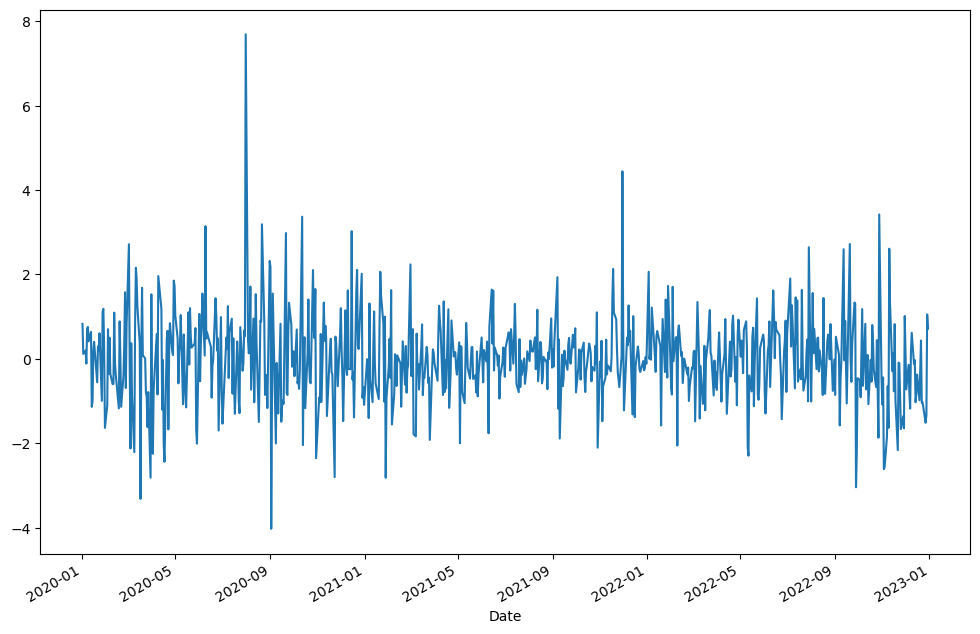

In [27]:
"""
Visualize regression residuals (resid) with matplotlib and visually confirm that residuals are most 
likely oscillating around zero (indicates no autocorrelation). 
"""
results.resid.plot(figsize = (12, 8))
plt.show()

# (-> regression residuals are oscillating around zero (most likely))

In [28]:
"""
Import durbin_watson from statsmodels.stats.stattools and calculate the model's Durbin-Watson Statistic  
(DW) using the regression residuals (resid).
"""

from statsmodels.stats.stattools import durbin_watson
dw = durbin_watson(results.resid)
dw

1.8801440203503685

In [29]:
"""
Test for autocorrelation with the Durbin-Watson Test (DW). Show that the model's DW Statistic 
is close to 2 (here: within the interval from 1.6  to 2.4), which indicates the absence of autocorrelation. 
(Output: True -> no autocorrelation)
"""
dw > 1.6 and dw < 2.4

True

# 11. Run the Regression for all Stocks and Prepare Results Tables

<div data-purpose="safely-set-inner-html:rich-text-viewer:html" class="lab-rich-text-viewer--lab-html-content---C2Yj  rt-scaffolding"><p>In this task, you will run the <strong>regression for all stocks</strong> with efficient Python code and <strong>prepare detailed results tables</strong> for the fund management team in the following form:</p><p><br></p><p><strong>Table 1: Regression Coefficients (Intercepts and Slopes)</strong></p><figure><img src="https://udemy-images.s3.amazonaws.com:443/redactor/raw/create_lab_editor/2023-03-30_13-30-56-03d4744ccd4ac1e2fdf360b92ff8dca6.JPG" style="display: none;"><span class="ud-component--base-components--open-full-size-image"><div class="open-full-size-image--wrapper--R4gIm" data-purpose="open-full-size-image"><img src="https://udemy-images.s3.amazonaws.com:443/redactor/raw/create_lab_editor/2023-03-30_13-30-56-03d4744ccd4ac1e2fdf360b92ff8dca6.JPG" alt="" loading="eager"><button type="button" class="ud-btn ud-btn-large ud-btn-link ud-heading-md open-full-size-image--backdrop--Zor3j"><svg aria-label="Larger image" role="img" focusable="false" class="ud-icon ud-icon-large ud-icon-color-neutral"><use xlink:href="#icon-search"></use></svg></button></div></span></figure><p><br></p><p><strong>Table 2: Significance of Intercepts/Factors (True: significant, False: not significant) and overall Model Quality (r-squared)</strong> </p><figure><img src="https://udemy-images.s3.amazonaws.com:443/redactor/raw/create_lab_editor/2023-03-30_13-30-56-5f8a1a4fd1851c8770f6409b542801f8.JPG" style="display: none;"><span class="ud-component--base-components--open-full-size-image"><div class="open-full-size-image--wrapper--R4gIm" data-purpose="open-full-size-image"><img src="https://udemy-images.s3.amazonaws.com:443/redactor/raw/create_lab_editor/2023-03-30_13-30-56-5f8a1a4fd1851c8770f6409b542801f8.JPG" alt="" loading="eager"><button type="button" class="ud-btn ud-btn-large ud-btn-link ud-heading-md open-full-size-image--backdrop--Zor3j"><svg aria-label="Larger image" role="img" focusable="false" class="ud-icon ud-icon-large ud-icon-color-neutral"><use xlink:href="#icon-search"></use></svg></button></div></span></figure></div>

In [30]:
"""
Initialize two empty DataFrames (coeff and signif) with the columns 
'Intercept', 'Mkt_Prem', 'SMB', 'HML', 'RMW', 'CMA'.
"""

coeff = pd.DataFrame(columns = ['Intercept', 'Mkt_Prem', 'SMB', 'HML', 'RMW', 'CMA'])
signif = pd.DataFrame(columns = ['Intercept', 'Mkt_Prem', 'SMB', 'HML', 'RMW', 'CMA'])

<p>2. <strong>Iterate over the symbols list</strong> and perform the following steps for each symbol: </p>

<ul><li><p>Create the <strong>dataset</strong> <strong>df</strong> with the symbol and all five factors as a subset of data</p></li><li><p><strong>Define and fit </strong>the regression model with string replacement using .format()</p></li><li><p>Save the <strong>regression coefficients</strong> (params) in coeff </p></li><li><p>Save the <strong>statistical</strong> <strong>significance</strong> (True or False) of coefficients&nbsp; and <strong>rsquared</strong> in signif </p></li></ul>

In [31]:
for symbol in symbols:
    df = data[fivefactors + [symbol]]
    model = smf.ols("{} ~ Mkt_Prem + SMB + HML + RMW + CMA".format(symbol), data = df)
    results = model.fit()
    coeff.loc[symbol] = results.params
    signif.loc[symbol] = results.pvalues < significance_level
    signif.loc[symbol, "rsquared"] = results.rsquared

In [32]:
# Inspect coeff and signif.

coeff

,Intercept,Mkt_Prem,SMB,HML,RMW,CMA
AAPL,0.02,1.31,-0.19,-0.77,0.42,1.10
AJG,0.07,0.88,-0.25,0.24,0.07,-0.15
AVB,-0.06,0.88,-0.02,0.43,0.15,-0.11
DLR,-0.04,0.86,-0.48,-0.17,0.03,0.28
ICE,0.01,0.83,-0.32,0.12,-0.19,-0.10
INCY,-0.01,0.66,-0.12,-0.29,-0.34,0.41
KHC,-0.02,0.79,-0.34,0.19,0.20,0.77
LLY,0.10,0.74,-0.34,-0.28,0.13,0.82
MCHP,0.03,1.47,0.52,-0.28,0.30,-0.11
MDT,-0.07,0.82,-0.05,0.37,-0.00,-0.17


In [33]:
signif

,Intercept,Mkt_Prem,SMB,HML,RMW,CMA,rsquared
AAPL,False,True,True,True,True,True,0.80
AJG,False,True,True,True,False,False,0.58
AVB,False,True,False,True,False,False,0.49
DLR,False,True,True,True,False,True,0.40
ICE,False,True,True,True,True,False,0.55
INCY,False,True,False,True,True,True,0.28
KHC,False,True,True,True,True,True,0.42
LLY,False,True,True,True,False,True,0.28
MCHP,False,True,True,True,True,False,0.67
MDT,False,True,False,True,False,False,0.54


# 12. Summarize the Quality of Fama/French Factor Models in Explaining Stock Performance

<div data-purpose="safely-set-inner-html:rich-text-viewer:html" class="lab-rich-text-viewer--lab-html-content---C2Yj  rt-scaffolding"><p>In this task, you will <strong>summarize and compare the importance</strong> (significance) of the five factors in explaining stock performance across multiple Stocks. Which factor is the most important one? For how many stocks does each factor significantly explain the performance?&nbsp;Second, you will calculate the <strong>average quality (average r-squared) of the Fama/French 5 Factor Model</strong> in explaining stock performance across multiple stocks.&nbsp; &nbsp;</p></div>

<p>1. Calculate <strong>for how many stocks each factor is significant</strong> (relative frequency in %) by taking the mean of signif. Sort from <strong>high to low importance</strong> (descending). </p>

In [34]:
signif[fivefactors].mean().sort_values(ascending = False).mul(100)

Mkt_Prem   100.00
HML         86.67
SMB         66.67
CMA         46.67
RMW         40.00
dtype: float64

<p>Interpretation: The Market Premium is always significant. The marginal benefits of adding more (less significant) Factors (HML &amp; SMB in the 3-Factor-Model and CMA &amp; RMW in the 5-Factor-Model) are declining.</p>

In [35]:
# Calculate the (simple) mean rsquared across all stocks.

signif.rsquared.mean()

0.5282455279880509

<p>Interpretation: On average, the Fama/French 5 Factor Model explains more than 50% of the Stock Performance.</p>

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.pct_change.html


https://www.statsmodels.org/devel/example_formulas.html

https://hbr.org/2016/02/a-refresher-on-statistical-significance

https://www.statsmodels.org/dev/generated/statsmodels.stats.stattools.durbin_watson.html

https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/Data_Library/f-f_5_factors_2x3.html

https://blogs.cfainstitute.org/investor/2022/01/10/fama-and-french-the-five-factor-model-revisited/

